# Causal Inference Analysis

## Introduction

Causal inference is a crucial aspect of data analysis that goes beyond correlation to understand the cause-and-effect relationships between variables. Unlike traditional statistical methods, causal inference aims to answer questions about what happens to one variable when another variable is manipulated.

### What is DoWhy?

`DoWhy` is a Python library that provides a principled approach to causal inference. It leverages a combination of state-of-the-art algorithms and established causal inference techniques to allow users to estimate causal effects from observational data.

### Key Features of DoWhy:

- **Modeling Assumptions**: Explicitly state assumptions about the causal model using a graphical representation (causal graph).
- **Identification**: Automatically identify if the causal effect can be estimated from the given data and assumptions.
- **Estimation**: Use a variety of methods to estimate the causal effect, including regression, matching, instrumental variables, and more.
- **Refutation**: Perform robustness checks to test the validity of the estimated causal effect.

### Why Causal Inference?

Causal inference is essential for:
- Understanding the true impact of interventions or treatments.
- Making informed decisions based on the likely outcomes of different actions.
- Going beyond simple associations to uncover the mechanisms behind observed data patterns.

### Objectives of This Notebook
1. Setup and Installation

2. Connecting to Snowflake using Snowpark

3. Fetching Data and Loading it into a Pandas DataFrame

4. Performing Causal Inference with DoWhy


---

# Setup and Installation
First, ensure you have the necessary libraries installed. You'll need `dowhy`, and `causalnex`.


In [1]:
!pip install dowhy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 8.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 79.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 69.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.0/299.0 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.3/220.3 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 92.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 42.6 MB/s eta 0:00:00
     ━━━

## Importing libraries

In [8]:
import os
import pandas as pd
import json
import logging
import sys
import site
import warnings
sys.path.append(site.getusersitepackages())

from keboola.component import CommonInterface
import ipywidgets as widgets
from IPython.display import display, clear_output

warnings.filterwarnings('ignore')

---
# Load dataset
To demonstrate the steps of Causal Inference Analysis, we will work with the Titanic dataset.

Execute the cell below to download the dataset and load it as a dataframe.

In [29]:
import pandas as pd

# URL of the Titanic dataset
titanic_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Load the Titanic dataset into a pandas DataFrame
data = pd.read_csv(titanic_url)

# Display the first few rows of the DataFrame to confirm loading
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Solve Missing Values

### Identify Missing Values

In this section, we will identify the missing values in the dataset. This will help us understand the extent of missing data and decide on an appropriate action to handle it.


In [30]:
# Function to identify missing values
def getMissing(data):
    missing_cnt = data.isna().sum().sum()
    missing_pct = missing_cnt / (len(data.columns) * len(data))     
    missing_out = data.isna().sum()
    
    print('=====================================')
    print(f'Total missing cells: [{missing_cnt}]')
    print(f'Percentage of missing cells: [{missing_pct:.2%}]')
    print('=====================================')
    print('Count of missing cells per column:')
    print(missing_out)
    print('=====================================')
    print('-------------------------------------')

# Identify missing values in the dataset
getMissing(data)


Total missing cells: [866]
Percentage of missing cells: [8.10%]
Count of missing cells per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-------------------------------------


### Decide How to Handle Missing Values

Choose a missing action from the following options:
- **"drop"**: Drop rows with missing values in the selected column(s).
- **"replace"**: Replace missing numeric values with the MEAN and missing categorical values with a new category named "Undefined" for the selected columns.
- **"replaceNumeric"**: Replace missing numeric values with the MEAN value for the selected columns.
- **"replaceCategorical"**: Replace missing categorical values with a new category named "Undefined" for the selected columns.
- **"None"**: Ignore missing values.

<h3><font color="red">↓↓↓ Execute the cell below and choose how to solve missing values ↓↓↓</font></h3>


In [31]:
# Display widgets to choose how to handle missing values
if data.isna().sum().sum() > 0:
    MISSING_ACTION = widgets.ToggleButtons(
        options=['None', 'drop', 'replace', 'replaceNumeric', 'replaceCategorical'],
        description='Action:',
        disabled=False,
        button_style='info',  # 'success', 'info', 'warning', 'danger' or ''
        value='None'
    )
    COLUMNS_ACTION = widgets.SelectMultiple(
        options=['ALL COLUMNS'] + list(data.columns),
        description='Columns:',
        ensure_option=True,
        disabled=False,
        rows=15
    )

    display(MISSING_ACTION)
    display(COLUMNS_ACTION)
else:
    logging.info('[INFO] There are no missing values in your dataset.')

ToggleButtons(button_style='info', description='Action:', options=('None', 'drop', 'replace', 'replaceNumeric'…

SelectMultiple(description='Columns:', options=('ALL COLUMNS', 'PassengerId', 'Survived', 'Pclass', 'Name', 'S…

### Apply Missing Values Action

Execute the cell below to apply the chosen action for handling missing values.

<i><b>NOTE:</b> You can select and execute the missing action multiple times.</i><br>
<i>For example, you can first select 'drop' for a specific column and then 'replaceNumeric' for numeric columns you prefer not to drop.</i>


In [33]:
import ast

# Function to handle missing values based on selected action
def solveMissing(data, MISSING_ACTION):
    messageOut = []
    allColumns = list(data.columns)
    datePreds = []
    categoricalPreds = []
    numericPreds = []
    
    for predictor in allColumns:
        if data[predictor].dtype == 'object':
            try:
                pd.to_datetime(data[predictor])
                datePreds.append(predictor)
            except:
                categoricalPreds.append(predictor) 
        elif 'datetime' in str(data[predictor].dtype):
            datePreds.append(predictor)
        else:
            numericPreds.append(predictor)
    
    if 'None' in MISSING_ACTION[:4]:
        messageOut.append('Not solving any columns.')
        
    if MISSING_ACTION == "replaceAll":
        messageOut.append('Replacing missing values in all columns:')
        for col in allColumns:
            if data[col].isna().sum() > 0:
                if col in numericPreds:
                    data[col].fillna(data[col].mean(), inplace=True)
                else:
                    data[col].fillna('REPLACED-Undefined', inplace=True)
                messageOut.append(col)
            
    elif "replaceNumeric" in MISSING_ACTION:
        messageOut.append('Replacing missing values in NUMERIC columns:')
        for col in numericPreds:
            if data[col].isna().sum() > 0:
                data[col].fillna(data[col].mean(), inplace=True)            
                messageOut.append(col)
            
    elif "replaceCategorical" in MISSING_ACTION:
        messageOut.append('Replacing missing values in CATEGORICAL columns:')
        for col in categoricalPreds:
            if data[col].isna().sum() > 0:
                data[col].fillna('REPLACED-Undefined', inplace=True)
                messageOut.append(col)
    
    elif "replace" in MISSING_ACTION:
        messageOut.append('Replacing missing values in selected columns.')
        colsToReplace = ast.literal_eval(MISSING_ACTION.replace("replace", ""))
        for col in colsToReplace:
            if col in categoricalPreds:
                if data[col].isna().sum() > 0:
                    data[col].fillna('REPLACED-Undefined', inplace=True)
                    messageOut.append(col)
            else:
                if data[col].isna().sum() > 0:
                    data[col].fillna(data[col].mean(), inplace=True)            
                    messageOut.append(col)
                        
    if MISSING_ACTION == 'dropAll':
        messageOut.append('Dropping missing values in all columns.')
        data.dropna(inplace=True)
            
    elif "drop" in MISSING_ACTION[:4]:
        messageOut.append('Dropping missing values in selected columns.')
        colsToDrop = ast.literal_eval(MISSING_ACTION.replace("drop", ""))
        data.dropna(subset=colsToDrop, inplace=True)
        messageOut.append(colsToDrop)
    
    if len(messageOut) == 0:
        messageOut.append('[INFO] There is nothing to do for selected action.')
    print(messageOut)
    return data

# Apply the chosen action for handling missing values
missing_action_value = MISSING_ACTION.value
columns_action_value = list(COLUMNS_ACTION.value)
if 'ALL COLUMNS' in columns_action_value:
    missing_action_concat = missing_action_value + 'All'
else:
    missing_action_concat = missing_action_value + str(columns_action_value)

data = solveMissing(data, missing_action_concat)

display(data.head())

['Replacing missing values in NUMERIC columns:', 'Age']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


## Categorical Variable Encoding
The Causal Inference models require numeric variables. We'll use Label Encoding to transform our categorical variables to numeric.

__Execute the code below to identify CATEGORICAL variables__

In [34]:
from IPython.display import display, clear_output
from ipywidgets import Layout
from sklearn.preprocessing import LabelEncoder


def getDataTypes(data):
    allColumns = list(data.columns)
    datePreds = []
    categoricalPreds = []
    numericPreds = []
    
    for predictor in allColumns:
        if data[predictor].dtype == 'object':
            try:
                pd.to_datetime(data[predictor])
                datePreds.append(predictor)
            except:
                categoricalPreds.append(predictor) 
        elif 'datetime' in str(data[predictor].dtype):
            datePreds.append(predictor)
        else:
            numericPreds.append(predictor)
    
    print('=====================================')
    print('Dataset contains following data types')
    print('Date variables:', '[', len(datePreds), ']')
    print(datePreds)
    print('-------------------------------------')
    print('Categorical variables:', '[', len(categoricalPreds), ']')
    print(categoricalPreds)
    print('-------------------------------------')
    print('Numeric variables:', '[', len(numericPreds), ']')
    print(numericPreds)
    print('=====================================')

    return datePreds, categoricalPreds, numericPreds


# Assume df_global is the DataFrame loaded from previous code block
if data is None:
    raise ValueError("DataFrame is not loaded. Please load the DataFrame first.")

# Identify initial data types
datePreds, categoricalPreds, numericPreds = getDataTypes(data)

# Create widgets for user selection with adjusted layout and style for better visibility
numeric_cols_widget = widgets.SelectMultiple(
    options=data.columns,
    description='Convert to Numeric',
    disabled=False,
    layout=Layout(width='70%', height='150px'),
    style={'description_width': 'initial'}
)

categorical_cols_widget = widgets.SelectMultiple(
    options=data.columns,
    description='Variables to Encode',
    disabled=False,
    layout=Layout(width='70%', height='150px'),
    style={'description_width': 'initial'}
)

ignore_cols_widget = widgets.SelectMultiple(
    options=data.columns,
    description='Variables to Ignore (drop)',
    disabled=False,
    layout=Layout(width='70%', height='150px'),
    style={'description_width': 'initial'}
)

apply_button = widgets.Button(
    description='Apply',
    disabled=False,
    button_style='info',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Apply selections'
)

output = widgets.Output()

def apply_selections(_):
    global data  # Ensure we're modifying the global data
    with output:
        clear_output()
        to_numeric = list(numeric_cols_widget.value)
        to_encode = list(categorical_cols_widget.value)
        to_ignore = list(ignore_cols_widget.value)
        
        # Drop ignored columns
        data.drop(columns=to_ignore, inplace=True, errors='ignore')
        
        # Convert selected columns to numeric
        for var in to_numeric:
            if var in data.columns:  # Ensure the column is not dropped
                data[var] = pd.to_numeric(data[var], errors='coerce')
        
        # Update data types after conversion
        datePreds, categoricalPreds, numericPreds = getDataTypes(data)
        
        # Encode selected columns
        for col in to_encode:
            if col in data.columns:  # Ensure the column is not dropped
                lb_make = LabelEncoder()
                data[col + '_code'] = lb_make.fit_transform(data[col])
                data.drop(col, axis=1, inplace=True)
        
        # Display the updated DataFrame
        display(data.head())

# Attach the apply function to the button
apply_button.on_click(apply_selections)

# Display widgets
display(numeric_cols_widget, categorical_cols_widget, ignore_cols_widget, apply_button, output)


Dataset contains following data types
Date variables: [ 0 ]
[]
-------------------------------------
Categorical variables: [ 5 ]
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
-------------------------------------
Numeric variables: [ 7 ]
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


SelectMultiple(description='Convert to Numeric', layout=Layout(height='150px', width='70%'), options=('Passeng…

SelectMultiple(description='Variables to Encode', layout=Layout(height='150px', width='70%'), options=('Passen…

SelectMultiple(description='Variables to Ignore (drop)', layout=Layout(height='150px', width='70%'), options=(…

Button(button_style='info', description='Apply', style=ButtonStyle(), tooltip='Apply selections')

Output()

---
# Causal Inference Analysis with DoWhy

We will perform a causal inference analysis using the DoWhy library. Causal inference helps us understand the effect of one variable on another, going beyond simple correlations to understand causation.



## Step-by-Step Explanation

### 1. Import Necessary Libraries

First, we import the required libraries. We use `pandas` to handle our data and `dowhy` for causal inference.


In [16]:
from dowhy import CausalModel


---
### Define the Causal Model

Next, we define our causal model. This involves specifying the treatment variable, the outcome variable, and any common causes (confounders).

- **Treatment Variable (`Fare`)**: This is the variable you suspect affects the outcome. 
- **Outcome Variable (`Survived`)**: This is the variable you want to understand the impact on. 
- **Common Causes**: These are variables that might affect both the treatment and the outcome, such as `Age`, `Gender` or others


In [35]:
# Widgets for causal model selection
treatment_widget = widgets.Dropdown(
    options=data.columns,
    description='Treatment:',
    disabled=False
)

outcome_widget = widgets.Dropdown(
    options=data.columns,
    description='Outcome:',
    disabled=False
)

common_causes_widget = widgets.SelectMultiple(
    options=data.columns,
    description='Common Causes:',
    disabled=False
)

define_model_button = widgets.Button(
    description='Define Model',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Define causal model'
)

causal_output = widgets.Output()

# Global variable to store the causal model
causal_model_global = None

def define_causal_model(_):
    global causal_model_global
    with causal_output:
        clear_output()
        treatment = treatment_widget.value
        outcome = outcome_widget.value
        common_causes = list(common_causes_widget.value)
        
        # Define the causal model
        causal_model_global = CausalModel(
            data=data,
            treatment=treatment,
            outcome=outcome,
            common_causes=common_causes
        )
        print("Causal model defined with treatment:", treatment)
        print("Outcome:", outcome)
        print("Common causes:", common_causes)
        # You can add further code to display the model or its properties

# Attach the define model function to the button
define_model_button.on_click(define_causal_model)

# Display causal model widgets
display(treatment_widget, outcome_widget, common_causes_widget, define_model_button, causal_output)



Dropdown(description='Treatment:', options=('Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', '…

Dropdown(description='Outcome:', options=('Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fa…

SelectMultiple(description='Common Causes:', options=('Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', '…

Button(description='Define Model', style=ButtonStyle(), tooltip='Define causal model')

Output()

--- 
### View the Causal Graph
We can visualize the causal graph to understand the relationships between the variables. This helps in ensuring the model is correctly specified.

`Nodes` in the Causal Graph are individual variables used in the CausalModel

`Edges` (arrows) represent the causal relationships between the variables.

- An arrow from `variable 1` to `variable 2` means that `variable 1` is considered a causal factor affecting the `variable 2`.
- Multiple arrows between nodes indicate potential confounding relationships.


#### Explanation of the Relationships
__Direct Effects:__
Direct links between a variable and the outcome variable suggest that there is a direct impact between the two.

__Indirect Effects:__
A `variable 1` can be linked to a `variable 2` and only `variable 2` is linked to the `outcome variable`. In such case we say that `variable 1` has indirect effect on the `outcome variable`

__Confounding Variables:__
There might be variables that effect the `outcome variable` both directly and indirectly - we call this `potentil confounders`.
These variables are potential confounders that need to be controlled for to accurately estimate the causal effect on `outcome variable`.

#### Why This Matters
Understanding the structure of the causal graph helps us:
- Identify potential confounders that need to be controlled for in the analysis.
- Ensure that the causal pathways are correctly specified, which is critical for accurate causal inference.
- Visualize the assumptions about the causal relationships between variables.

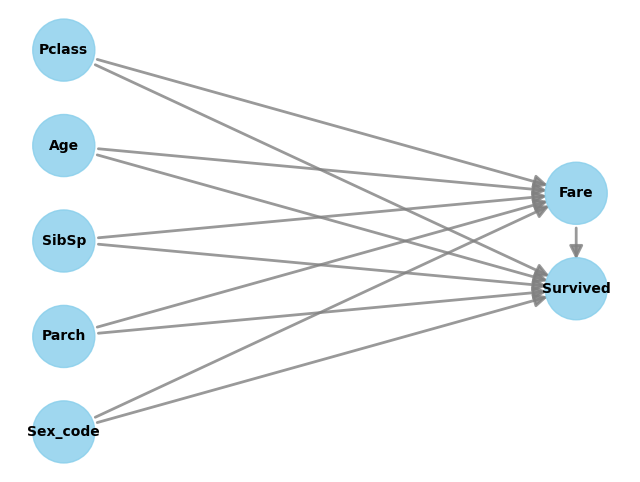

In [36]:
# View the causal graph
model = causal_model_global
model.view_model()


---
### Identify the Causal Effect
The next step is to identify the causal effect using the model.

This step involves determining how we can estimate the causal effect from the data.

`identify_effect()`: This method identifies the causal effect by using the causal graph to determine the appropriate method to estimate the effect. It checks if the causal effect can be identified given the specified model.


In [37]:
# Identify causal effect
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                
───────(E[Survived|SibSp,Parch,Age,Sex_code,Pclass])
d[Fare]                                             
Estimand assumption 1, Unconfoundedness: If U→{Fare} and U→Survived then P(Survived|Fare,SibSp,Parch,Age,Sex_code,Pclass,U) = P(Survived|Fare,SibSp,Parch,Age,Sex_code,Pclass)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



## Interpretation of possible identified estimant (for sample TITANIC dataset)

### Estimand Type
Estimand Type: `EstimandType.NONPARAMETRIC_ATE`
This indicates that the type of causal effect being estimated is the Average Treatment Effect (ATE) using a non-parametric approach. The ATE is the expected difference in the outcome if everyone in the population were given the treatment versus if no one were given the treatment.

__Estimand : `backdoor`__

The "backdoor" criterion is used to control for confounding variables. This method leverages the backdoor adjustment formula to estimate the causal effect by conditioning on a set of covariates that block all backdoor paths from the treatment to the outcome.

- __Estimand Expression:__

```css
   d                                                                          
───────(E[Survived|Sex_code,Age,Parch,Pclass,SibSp])
d[Fare]    
```

  - This mathematical expression represents the derivative (or causal effect) of the expected value of Survived with respect to Fare, conditioned on the covariates Sex_code, Age, Parch (Parents_Children_Aboard), Pclass, and SibSp(Siblings_Spouses_Aboard).
  
__Estimand assumption 1__
 - This assumption states that there are no unobserved confounders (U) that affect both the treatment (Fare) and the outcome (Survived). In other words, after conditioning on the observed covariates (Sex_code, Age, Parch, Pclass, SibSp), the treatment assignment is independent of the outcome.
 
__Estimand : iv (Instrumental Variables)__

- This approach uses instrumental variables to estimate the causal effect. However, in this case, no instrumental variables were found in the data that satisfy the necessary conditions for a valid IV estimation.

__Estimand : frontdoor (Frontdoor Adjustment)__

- This approach uses the frontdoor criterion to estimate the causal effect. Similar to the IV approach, no variables were found that satisfy the conditions for a valid frontdoor adjustment in this model.

---
### Estimate the Causal Effect
Now we estimate the causal effect using a specified method. 
Here, we use the "backdoor.linear_regression" method, which is suitable for continuous outcomes and treatments.

In DoWhy, the estimate_effect method allows you to choose different estimation methods to estimate the causal effect. The method_name parameter specifies the estimation method you want to use. The choice of method depends on the characteristics of your data and the assumptions you are willing to make.

Here are some common method names you can use with estimate_effect:

1. Backdoor Methods
These methods adjust for confounders by modeling the relationship between treatment, outcome, and confounders.

`backdoor.linear_regression`: Uses linear regression to estimate the causal effect.
`backdoor.propensity_score_matching`: Uses propensity score matching to estimate the causal effect by matching treated and control units with similar propensity scores.
`backdoor.propensity_score_weighting`: Uses propensity score weighting to reweight the samples and estimate the causal effect.
`backdoor.propensity_score_stratification`: Stratifies the data into bins based on propensity scores and estimates the causal effect within each stratum.


2. Instrumental Variable (IV) Methods
These methods use instrumental variables to estimate causal effects when there are unobserved confounders.

`iv.two_stage_least_squares`: Uses two-stage least squares regression for instrumental variable estimation.


3. Frontdoor Methods
These methods adjust for confounders using the frontdoor criterion.

`frontdoor.adjustment`: Uses the frontdoor adjustment formula to estimate the causal effect.


#### Choosing a Method
The choice of method depends on the specific characteristics of your data and the assumptions you are willing to make. 

__Here are some guidelines:__

- `Linear Regression (backdoor.linear_regression)`: Use this if you believe the relationship between your treatment, outcome, and confounders can be modeled linearly.
- `Propensity Score Methods`: Use these if you want to balance the covariates between treated and control groups.
- `Matching (backdoor.propensity_score_matching)`: Use this if you prefer to match treated and control units with similar propensity scores.
- `Weighting (backdoor.propensity_score_weighting)`: Use this if you want to reweight the samples based on propensity scores.
- `Stratification (backdoor.propensity_score_stratification)`: Use this if you prefer to stratify the data into bins based on propensity scores.
- `Instrumental Variable Methods (iv.two_stage_least_squares)`: Use this if you have a valid instrumental variable that affects the treatment but not the outcome directly.
- `Frontdoor Methods (frontdoor.adjustment)`: Use this if you can identify a frontdoor variable that mediates the effect of the treatment on the outcome and blocks all backdoor paths.

In [38]:
# Estimate the causal effect
causal_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

# Display the causal effect
print('Realized estimand:')
print(causal_estimate.realized_estimand_expr)
print('')
print('Estimate value:')
print(causal_estimate.value)


Realized estimand:
b: Survived~Fare+SibSp+Parch+Age+Sex_code+Pclass

Estimate value:
0.00019838703492081056


### Interpretation of model estimate effect for the sample TITANIC dataset
__Realized Estimand:__

- Regression Formula: `Survived ~ Fare + Sex_code + Age + Parch + Pclass + SibSp`
- Target Units: The estimate is for the average treatment effect (ATE).

__Estimate Value:__ 0.00019838703492081056
- This mean value represents the estimated average causal effect of the treatment (`Fare`) on the outcome (`Survived`), after controlling for the specified confounders.

#### Interpretation
The small positive mean value (0.00019838703492081056) suggests that, on average, an increase in the fare has a very slight positive effect on the probability of survival, after adjusting for other variables like sex, age, family aboard, class, and siblings/spouses aboard.

This estimate, while statistically small, might indicate that passengers who paid higher fares had a marginally higher chance of survival, possibly reflecting socioeconomic factors or access to better lifeboat accommodations during the Titanic disaster.


# What's next? Experiment, adjust, repeat...

The example showed that the Fare variable doesn't have a big impact on Survival. Let's try another one...

Causal Graph not provided. DoWhy will construct a graph based on data inputs.
Causal Graph not provided. DoWhy will construct a graph based on data inputs.
There are an additional 3 variables in the dataset that are not in the graph. Variable names are: '['Embarked', 'Name', 'Ticket']'
There are an additional 3 variables in the dataset that are not in the graph. Variable names are: '['Embarked', 'Name', 'Ticket']'


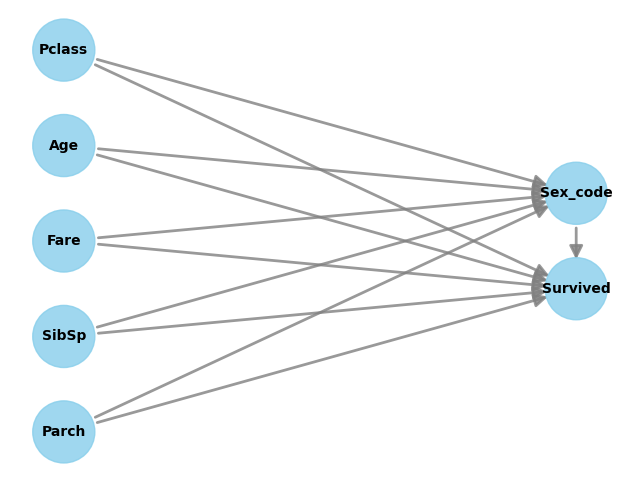

Realized estimand:
b: Survived~Sex_code+SibSp+Parch+Age+Fare+Pclass

Estimate value:
-0.49322283890980323


In [39]:
# Define the causal model
model = CausalModel(
    data=data,
    treatment="Sex_code",
    outcome="Survived",
    common_causes=["Pclass", "Age", "Fare", "SibSp", "Parch"]
)

# View the causal graph
model.view_model()

# Identify causal effect
identified_estimand = model.identify_effect()

# Estimate the causal effect
causal_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

# Display the causal effect
print('Realized estimand:')
print(causal_estimate.realized_estimand_expr)
print('')
print('Estimate value:')
print(causal_estimate.value)

## --->
A mean value of __-0.49322283890980323__ indicates that being male (if Sex_code=0) is associated with a __decrease in the probability of survival by approximately 0.493 (or 49.3 percentage points)__, compared to being female (if Sex_code=1), after controlling for the specified confounders.